# RVEA

In [50]:
from pymoo.algorithms.moo.rvea import RVEA
from pymoo.optimize import minimize
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.indicators.igd import IGD
from pymoo.indicators.hv import HV
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## PROBLEM ZDT1

In [14]:
# configuración
problem = get_problem("zdt1")  
ref_dirs = get_reference_directions("das-dennis", problem.n_obj, n_partitions=12)

In [16]:
results = []
for seed in [42, 123, 456]:
    algorithm = RVEA(ref_dirs=ref_dirs, pop_size=100)   
    res = minimize(problem,
                   algorithm,
                   ('n_gen', 100),  
                   verbose=False)
    results.append(res)

In [17]:
# Métricas 
Fs = [r.F for r in results]

In [ ]:
# IGD 
pf_ref = problem.pareto_front()
igd_vals = [IGD(pf_ref)(F) for F in Fs]

In [ ]:
# HV 
F_all = np.vstack(Fs)
ref_point = np.max(F_all, axis=0) + 0.1 * np.maximum(np.max(F_all, axis=0), 1.0)
hv_vals = [HV(ref_point=ref_point)(F) for F in Fs]

In [ ]:
# Resumen de resultados
seeds = [42, 123, 456]
print("Seed   IGD              HV")
for sd, igd_i, hv_i in zip(seeds, igd_vals, hv_vals):
    print(f"{sd:<6} {igd_i:<14.6g} {hv_i:<14.6g}")

print("\nResumen:")
print(f"IGD mean: {np.mean(igd_vals):.4g}  std: {np.std(igd_vals, ddof=1):.4g}")
print(f"HV  mean: {np.mean(hv_vals):.4g}   std: {np.std(hv_vals, ddof=1):.4g}")

Seed   IGD              HV
42     0.00439461     0.749471      
123    0.00536549     0.747591      
456    0.00524718     0.747882      

Resumen:
IGD mean: 0.005002  std: 0.0005297
HV  mean: 0.7483   std: 0.001012


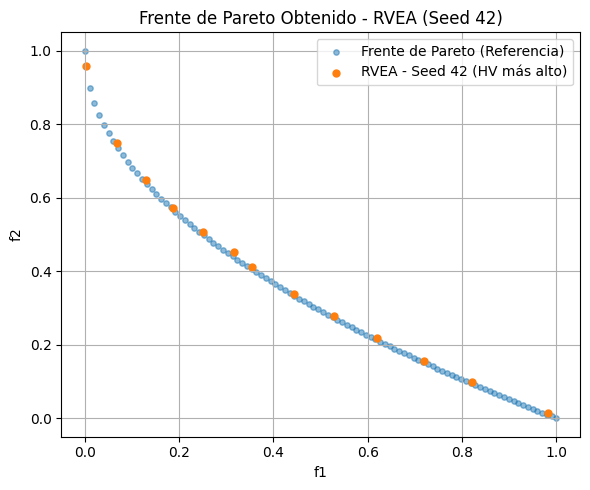

In [ ]:
# Seleccionar la seed ganadora
index_best = seeds.index(42)   
best_F = Fs[index_best]        

# --- Frente de referencia también (opcional pero recomendado para comparación visual) ---
pf_ref = problem.pareto_front()

# --- Graficar ---
plt.figure(figsize=(6, 5))
if pf_ref is not None:
    plt.scatter(pf_ref[:, 0], pf_ref[:, 1], s=15, alpha=0.5, label="Frente de Pareto (Referencia)")

plt.scatter(best_F[:, 0], best_F[:, 1], s=25, label=f"RVEA - Seed 42 (HV más alto)")

plt.title("Frente de Pareto Obtenido - RVEA (Seed 42)")
plt.xlabel("f1")
plt.ylabel("f2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## PROBLEM DTLZ2

In [35]:
# configuración
problem = get_problem("dtlz2")  
ref_dirs = get_reference_directions("das-dennis", problem.n_obj, n_partitions=12)
pf_ref   = problem.pareto_front(ref_dirs) 

In [36]:
results = []
for seed in [42, 123, 456]:
    algorithm = RVEA(ref_dirs=ref_dirs, pop_size=100)   
    res = minimize(problem,
                   algorithm,
                   ('n_gen', 100),  
                   verbose=False)
    results.append(res)

In [37]:
# Métricas 
Fs = [r.F for r in results]

In [ ]:
# IGD 
pf_ref = problem.pareto_front()
igd_vals = [IGD(pf_ref)(F) for F in Fs]

In [ ]:
# HV 
F_all = np.vstack(Fs)
ref_point = np.max(F_all, axis=0) + 0.1 * np.maximum(np.max(F_all, axis=0), 1.0)
hv_vals = [HV(ref_point=ref_point)(F) for F in Fs]

In [ ]:
# Resumen de resultados
seeds = [42, 123, 456]
print("Seed   IGD              HV")
for sd, igd_i, hv_i in zip(seeds, igd_vals, hv_vals):
    print(f"{sd:<6} {igd_i:<14.6g} {hv_i:<14.6g}")

print("\nResumen:")
print(f"IGD mean: {np.mean(igd_vals):.4g}  std: {np.std(igd_vals, ddof=1):.4g}")
print(f"HV mean: {np.mean(hv_vals):.4g}   std: {np.std(hv_vals, ddof=1):.4g}")

Seed   IGD              HV
42     0.00439461     0.749471      
123    0.00536549     0.747591      
456    0.00524718     0.747882      

Resumen:
IGD mean: 0.005002  std: 0.0005297
HV mean: 0.7483   std: 0.001012


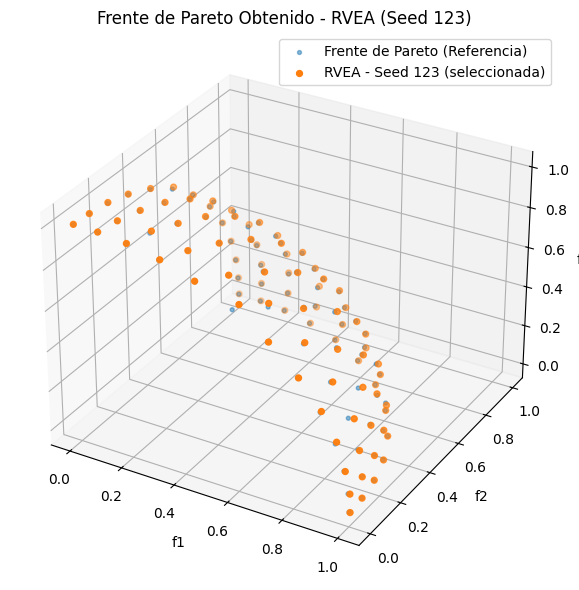

In [ ]:
# Seleccionar la seed ganadora 
index_best = seeds.index(123)    
best_seed  = seeds[index_best]
best_F     = Fs[index_best]

# Frente de referencia para DTLZ2 
ref_dirs = get_reference_directions("das-dennis", problem.n_obj, n_partitions=12)
pf_ref   = problem.pareto_front(ref_dirs)   

# Graficar en 3D
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')

if pf_ref is not None:
    ax.scatter(pf_ref[:,0], pf_ref[:,1], pf_ref[:,2],
               s=8, alpha=0.5, label="Frente de Pareto (Referencia)")

ax.scatter(best_F[:,0], best_F[:,1], best_F[:,2],
           s=18, label=f"RVEA - Seed {best_seed} (seleccionada)")

ax.set_title(f"Frente de Pareto Obtenido - RVEA (Seed {best_seed})")
ax.set_xlabel("f1"); ax.set_ylabel("f2"); ax.set_zlabel("f3")
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=pf_ref[:,0], y=pf_ref[:,1], z=pf_ref[:,2],
    mode="markers", marker=dict(size=3, opacity=0.5),
    name="Frente de Pareto (Referencia)"
))

fig.add_trace(go.Scatter3d(
    x=best_F[:,0], y=best_F[:,1], z=best_F[:,2],
    mode="markers", marker=dict(size=5),
    name=f"RVEA - Seed {best_seed}"
))

fig.update_layout(
    title=f"Frente DTLZ2 – RVEA (Seed {best_seed})",
    scene=dict(xaxis_title="f1", yaxis_title="f2", zaxis_title="f3"),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.write_html("../html/frente_dtlz2_seed123_interactivo.html", auto_open=True)